## What are ANNs?

![alt text](https://cdn-images-1.medium.com/max/1200/1*-teDpAIho_nzNShRswkfrQ.gif)

An ANN is made of many interconnected "**neurons**".   

Each neuron takes in some floating point numbers (e.g. 1.0, 0.5, -1.0) and multiplies them by some other floating point numbers (e.g. 0.7, 0.6, 1.4) known as **weights** (1.0 * 0.7 = 0.7, 0.5 * 0.6 = 0.3, -1.0 * 1.4 = -1.4).  The weights act as a mechanism to focus on, or ignore, certain inputs.  The weighted inputs then get summed together (e.g. 0.7 + 0.3 + -1.4 = -0.4) along with a **bias** value (e.g. -0.4 + ** -0.1 ** = -0.5).  

The summed value (x) is now transformed into an output value (y) according to the neuron's **activation function**  (y = **f**(x)).  Some popular activation functions are shown below: 

![alt text](https://cdn-images-1.medium.com/max/1600/1*RD0lIYqB5L2LrI2VTIZqGw.png)

e.g. -0.5 --> -0.05 if we use the **Leaky Rectified Linear Unit (Leaky ReLU)** activation function: y = f(x) = f(-0.5) = max(0.1*-0.5, -0.5) = max(-0.05, -0.5) = -0.05

In larger ANNs with many layers, the neuron's output value (e.g. -0.05) would become the input for another neuron.

![alt text](https://www.neuraldesigner.com/images/deep_neural_network.png)

However, one of the first ANNs was known as the perceptron and it consisted of only a single neuron.  

![alt text](https://cdn-images-1.medium.com/max/1600/1*_Zy1C83cnmYUdETCeQrOgA.png)

The output of the perceptron's neuron acts as the final prediction. 

![alt text](https://cdn-images-1.medium.com/fit/t/1600/480/1*gpH4JC6Dqx_hIjrrcrq1Og.gif)

This means that each neuron is a linear binary classifier all on its own (e.g. an output value >= 0 would be the blue class, but an output value < 0 would be the red class)

Lets code our own Perceptron

In [1]:
import numpy as np 

class Neuron:  
  def __init__(self, n_inputs, bias = 0., weights = None):  
    self.b = bias
    if weights: self.ws = np.array(weights)
    else: self.ws = np.random.rand(n_inputs)
    
  def __call__(self, xs): #calculate the neuron's output: multiply the inputs with the weights and sum the values together, add the bias value, then transform the value via an activation function
    return self._f(xs @ self.ws + self.b) 
  
  def _f(self, x): #activation function (default: leaky_relu)
    return max(x*.1, x)

using the same weights and bias value in the example above

In [2]:
perceptron = Neuron(n_inputs = 3, bias = -0.1, weights = [0.7, 0.6, 1.4])

using the same inputs (and a leaky relu activation function), lets calculate the output value

In [3]:
perceptron([1.0, 0.5, -1.0])

-0.05

Let's visualize our perceptron decision boundary using sample random data

In [4]:
import pandas as pd
import seaborn as sns

In [5]:
test_data = np.random.rand(1000,2)

<AxesSubplot:xlabel='x', ylabel='y'>

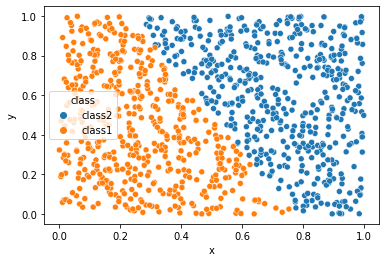

In [6]:
perceptron = Neuron(n_inputs = 2, weights = [-1.3, -0.7], bias = 1.) 
test_predictions = [perceptron(test) for test in test_data]
sns.scatterplot(x="x", y="y", hue="class",data=pd.DataFrame({'x':[x for x,_ in test_data], 'y':[y for _,y in test_data], 'class':['class1' if p >= 0.0 else 'class2' for p in test_predictions]}))

Notice that by adjusting the values of the weights and bias, you can adjust the neuron's decision boundary.   Therefore, a neuron learns by updating its weights and bias to reduce the error of its decisions.

<AxesSubplot:xlabel='x', ylabel='y'>

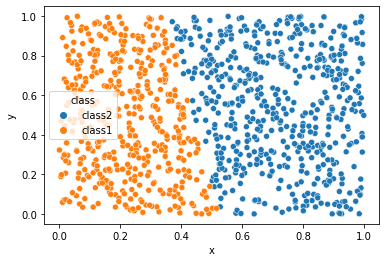

In [7]:
perceptron = Neuron(n_inputs = 2, weights = [-1.7, -0.3], bias = 0.9) 
test_predictions = [perceptron(test) for test in test_data]
sns.scatterplot(x="x", y="y", hue="class",data=pd.DataFrame({'x':[x for x,_ in test_data], 'y':[y for _,y in test_data], 'class':['class1' if p >= 0.0 else 'class2' for p in test_predictions]}))

So why do we need so many neurons in an ANN if one will suffice?  Well, individual neurons are unable to classify non-linearly separable data because they can only ever learn a linear decision boundary. 

However, by combining neurons together, we essentially combine their decision boundaries.  Therefore, an ANN composed of many neurons is able to learn non-linear decision boundaries.

![alt text](https://i.ytimg.com/vi/BR9h47Jtqyw/maxresdefault.jpg)

Neurons are connected together according to a specific network architecture.  Though there are different architectures, nearly all of them contain **layers**.  (Neurons in the same layer do not connect with one another.)



![alt text](https://cdn-images-1.medium.com/max/1600/1*_M4bZyuwaGby6KMiYVYXvg.jpeg)

There is typically an input layer (containing a number of neurons equal to the number of input features in the data), an output layer (containing a number of neurons equal to the number of classes) and a hidden layer (containing any number of neurons).  There can be more than one hidden layer  to allow the neural net to learn more complex decision boundaries (Any neural net with more than one hidden layer is considered a deep neural net).
 
 ![alt text](https://www.stoodnt.com/blog/wp-content/uploads/2018/03/Neural-Networks.png)


## Activation functions
Some comparison of common activation functions in ANN

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

In [9]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

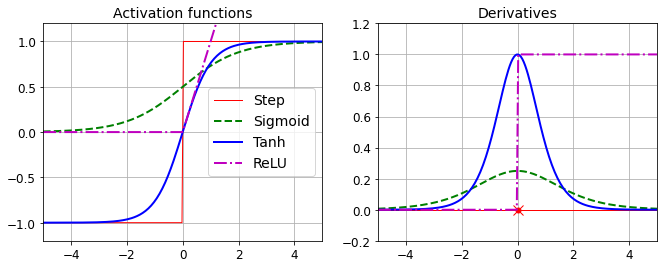

In [10]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

## Implement MLP from zero
Let's implement basic MLP for regression just using **numpy** as the base. We'll use Boston Housing Dataset (https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) as our input and create a MLP of 1 hidden layer to solve the regression problem.

We'll use Sigmoid activation function.

In [11]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))


def sigmoid_derivative(z):
    return sigmoid(z) * (1.0 - sigmoid(z))

Our MLP training function. 

Inspect the code! This is a basic MLP using Backpropagation technique.

In [12]:
def train(X, y, n_hidden, learning_rate, n_iter):
    m, n_input = X.shape
    W1 = np.random.randn(n_input, n_hidden)
    b1 = np.zeros((1, n_hidden))
    W2 = np.random.randn(n_hidden, 1)
    b2 = np.zeros((1, 1))
    for i in range(1, n_iter+1):
        Z2 = np.matmul(X, W1) + b1
        A2 = sigmoid(Z2)
        Z3 = np.matmul(A2, W2) + b2
        A3 = Z3

        dZ3 = A3 - y
        dW2 = np.matmul(A2.T, dZ3)
        db2 = np.sum(dZ3, axis=0, keepdims=True)

        dZ2 = np.matmul(dZ3, W2.T) * sigmoid_derivative(Z2)
        dW1 = np.matmul(X.T, dZ2)
        db1 = np.sum(dZ2, axis=0)

        W2 = W2 - learning_rate * dW2 / m
        b2 = b2 - learning_rate * db2 / m
        W1 = W1 - learning_rate * dW1 / m
        b1 = b1 - learning_rate * db1 / m

        if i % 100 == 0:
            cost = np.mean((y - A3) ** 2)
            print('Iteration %i, training loss: %f' % (i, cost))

    model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return model

Our test function

In [13]:
def predict(x, model):
    W1 = model['W1']
    b1 = model['b1']
    W2 = model['W2']
    b2 = model['b2']
    A2 = sigmoid(np.matmul(x, W1) + b1)
    A3 = np.matmul(A2, W2) + b2
    return A3

Load the dataset from sklearn

In [14]:
from sklearn import datasets
boston = datasets.load_boston()
num_test = 10  # the last 10 samples as testing set

Normalize and split the data

In [15]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

X_train = boston.data[:-num_test, :]
X_train = scaler.fit_transform(X_train)
y_train = boston.target[:-num_test].reshape(-1, 1)
X_test = boston.data[-num_test:, :]
X_test = scaler.transform(X_test)
y_test = boston.target[-num_test:]


Train!

In [16]:
n_hidden = 20
learning_rate = 0.1
n_iter = 2000

model = train(X_train, y_train, n_hidden, learning_rate, n_iter)

Iteration 100, training loss: 13.101051
Iteration 200, training loss: 8.999279
Iteration 300, training loss: 7.588557
Iteration 400, training loss: 6.729442
Iteration 500, training loss: 6.123435
Iteration 600, training loss: 5.664768
Iteration 700, training loss: 5.272511
Iteration 800, training loss: 4.927884
Iteration 900, training loss: 4.639644
Iteration 1000, training loss: 4.384474
Iteration 1100, training loss: 4.155875
Iteration 1200, training loss: 3.955100
Iteration 1300, training loss: 3.782052
Iteration 1400, training loss: 3.631175
Iteration 1500, training loss: 3.498059
Iteration 1600, training loss: 3.379471
Iteration 1700, training loss: 3.273009
Iteration 1800, training loss: 3.176696
Iteration 1900, training loss: 3.088821
Iteration 2000, training loss: 3.007972


Predict and compare!

In [17]:
predictions = predict(X_test, model)
print(predictions)
print(y_test)

[[22.08069115]
 [19.27988527]
 [21.5816176 ]
 [21.0536245 ]
 [21.21450608]
 [23.07765419]
 [22.77063884]
 [29.45662268]
 [27.6874525 ]
 [23.30541338]]
[19.7 18.3 21.2 17.5 16.8 22.4 20.6 23.9 22.  11.9]


In [25]:
y_pred = predictions.reshape(1, -1)[0]

Evaluate performance!

In [27]:
from sklearn.metrics import mean_squared_error


print(mean_squared_error(y_test, y_pred))

23.73671225051894
